In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


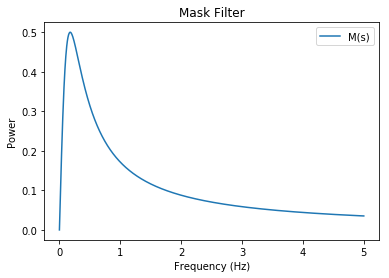

In [41]:
import matplotlib.pyplot as plt

from nengolib.signal import s

tau = 0.9

M = tau*s/(tau*s + 1)**2
I = (~s)

#assert (M - 1/(tau*s + 1)) == 1/(tau*s + 1)

freqs = np.linspace(0, 5, 1000)

Y = np.abs(M.evaluate(freqs))
c = np.sum(Y)

p = 10
f = np.where(np.cumsum(Y) >= c*p/100.0)[0][0]

plt.figure()
plt.title("Mask Filter")
plt.plot(freqs, Y, label="M(s)")
#plt.vlines([freqs[f]], 0, .5, label="%d%%" % p)
#plt.plot(freqs, np.abs((1/(tau*s + 1)).evaluate(freqs)), label="1/(tau*s + 1)")
#plt.plot(freqs, np.abs((M - 1/(tau*s + 1)).evaluate(freqs)), label="Difference")
#plt.plot(freqs, np.abs((1/(tau*s + 1)**2).evaluate(freqs)), label="Difference")
#plt.plot(freqs, np.abs(I.evaluate(freqs)), label="1/s")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.show()

c:\users\aaron\ctn\nengolib\nengolib\signal\system.py:213: UserWarning: Synapse ((A=[[  9.60594700e-01  -3.92079469e-01]
 [  9.80198673e-04   9.99802647e-01]], B=[[  9.80198673e-04]
 [  4.93383068e-07]], C=[[ -2. -20.]], D=[[ 0.05]], analog=False)) has extra delay due to passthrough (https://github.com/nengo/nengo/issues/938).
  "(https://github.com/nengo/nengo/issues/938)." % sys)


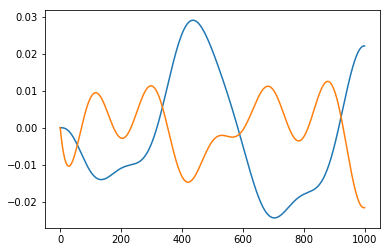

In [16]:
from nengo.processes import WhiteSignal

u = WhiteSignal(1, high=5, y0=0).run(1, dt=0.001)



plt.figure()
plt.plot(M.filt(I.filt(u)))
plt.plot((M*s*tau**2).filt(u))
plt.show()

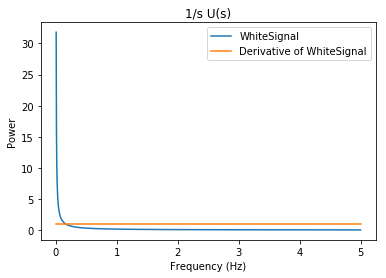

In [29]:
freqs = np.linspace(0, 5, 1000)

plt.figure()
plt.title("1/s U(s)")
plt.plot(freqs, np.abs(I.evaluate(freqs)), label="WhiteSignal")
plt.plot(freqs, np.abs((I/I).evaluate(freqs)), label="Derivative of WhiteSignal")
#plt.plot(freqs, np.abs((M - 1/(tau*s + 1)).evaluate(freqs)), label="Difference")
#plt.plot(freqs, np.abs((1/(tau*s + 1)**2).evaluate(freqs)), label="Difference")
#plt.plot(freqs, np.abs(I.evaluate(freqs)), label="1/s")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.show()